MAJOR PROJECT::

PREDICTION OF PASSENGERS IN TITANIC DATASHEET

NAME : MITALI MATHUR

COLLEGE : SRM INSTITUTE OF SCIENCE AND TECHNOLOGY

In this project we will be working with a TITANIC data set.
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we target to complete the analysis of what sorts of people were likely to survive.

This data set contains the following features:

survived         
pclass           
sibsp            
parch            
fare             
embarked         
class            
who              
adult_male       
deck           
embark_town      
alive            
alone            


IMPORTING LIBRARIES

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

sns.set(rc={'figure.figsize':(12, 10)})

MODELS USED::

LOGISTIC REGRESSION:Logistic regression is a statistical analysis method used to predict a data value based on prior observations of a data set. Logistic regression has become an important tool in the discipline of machine learning. The approach allows an algorithm being used in a machine learning application to classify incoming data based on historical data. 

SUPPORT VECTOR REGRESSION:
Support Vector Machines (SVMs) are well known in classification problems. The use of SVMs in regression is not as well documented, however. These types of models are known as Support Vector Regression (SVR).
In this article, I will walk through the usefulness of SVR compared to other regression models, do a deep-dive into the math behind the algorithm, and provide an example using the Boston Housing Price dataset.
Simple Linear Regression
In most linear regression models, the objective is to minimize the sum of squared errors. Take Ordinary Least Squares (OLS) for example. 




IMPORTING DATASETS

In [46]:
tit = pd.read_csv('/content/titanic (1).csv')

In [47]:
tit.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [48]:
tit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [49]:
tit.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [50]:
tit.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [51]:
print(pd.isnull(tit).sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


NUMERICAL VALUE ANALYSIS

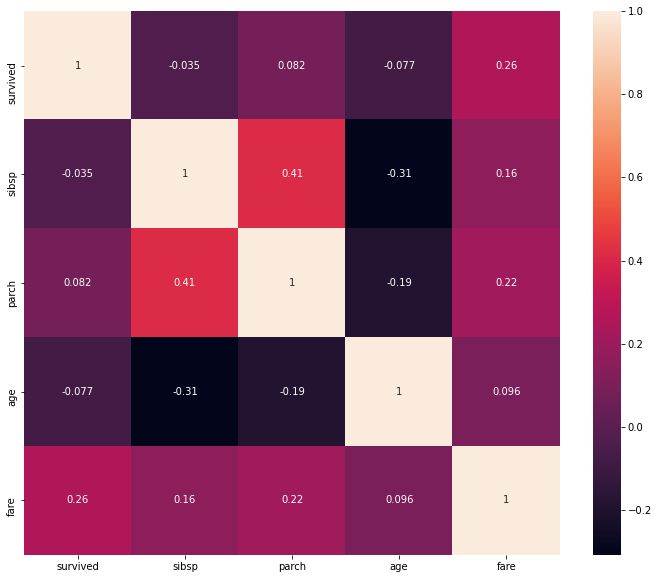

In [52]:
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(tit[["survived","sibsp","parch","age","fare"]].corr(), annot=True)

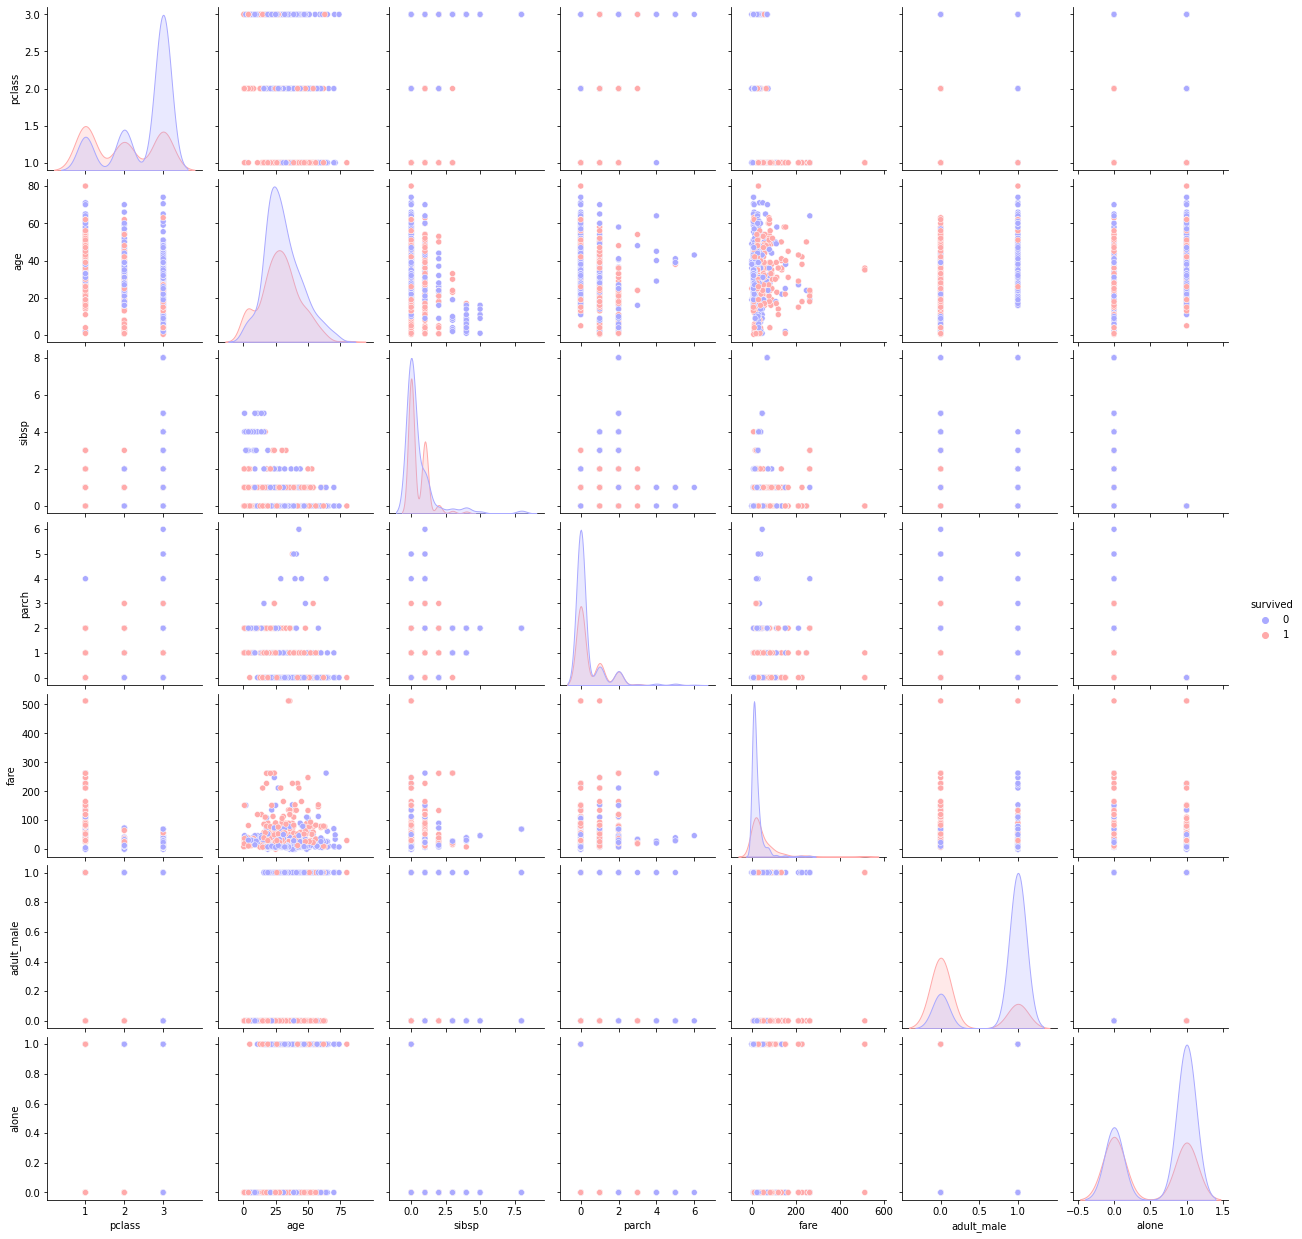

In [53]:
sns.pairplot(tit,hue='survived',palette='bwr')

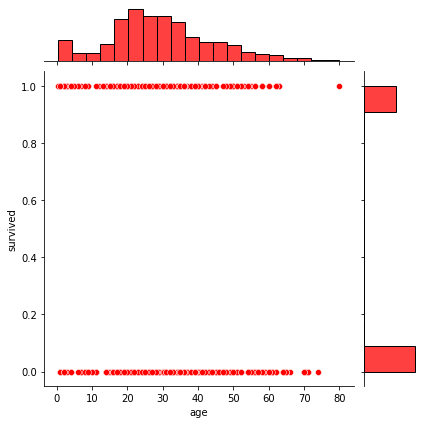

In [54]:
sns.jointplot(x='age',y='survived',data=tit,color='red')

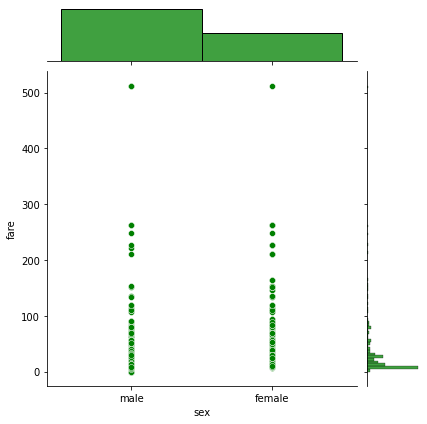

In [55]:
sns.jointplot(x='sex',y='fare',data=tit,color='green')

age

In [56]:
(tit['age'].isnull()).sum()

177

In [57]:
tit['age'].mean()

29.69911764705882

In [58]:
tit['age'] = tit['age'].fillna(tit.age.mean())

In [59]:
(tit['age'].isnull()).sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


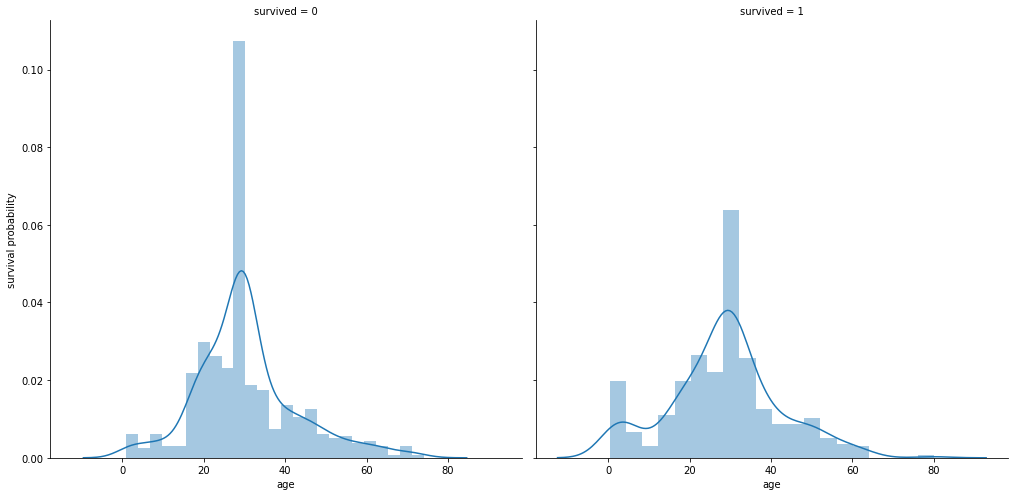

In [60]:
age_visual = sns.FacetGrid(tit, col = 'survived', size=7)
age_visual = age_visual.map(sns.distplot, "age")
age_visual = age_visual.set_ylabels("survival probability")

who,adult_male,deck,embark_town

In [61]:
list=['who','adult_male','deck','embark_town']
tit.drop(list, axis=1, inplace=True)

In [62]:
tit.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,no,True


sex

In [63]:
(tit['sex'].isnull()).sum()

0

In [64]:
genders = {"male": 0, "female": 1}
tit['sex'] = tit['sex'].map(genders)

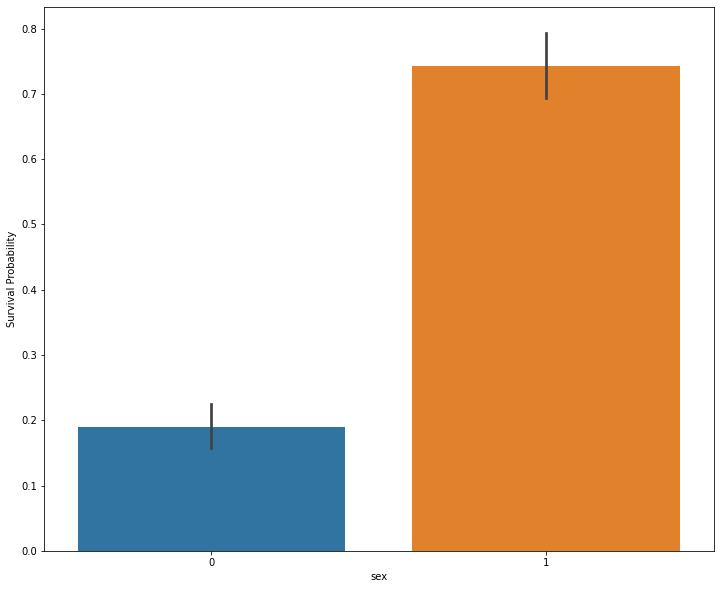

In [65]:
plt.figure(figsize=(12, 10))
age_plot = sns.barplot(x = "sex",y = "survived", data = tit)
age_plot = age_plot.set_ylabel("Survival Probability")

EMBARKED

In [66]:
tit["embarked"].isnull().sum()

2

In [67]:
tit["embarked"].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [68]:
#Fill Embarked with 'S' i.e. the most frequent values
tit["embarked"] = tit["embarked"].fillna("S")

In [69]:
tit["embarked"].isnull().sum()

0

In [70]:
ports = {"S": 0, "C": 1, "Q": 2}

tit['embarked'] = tit['embarked'].map(ports)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


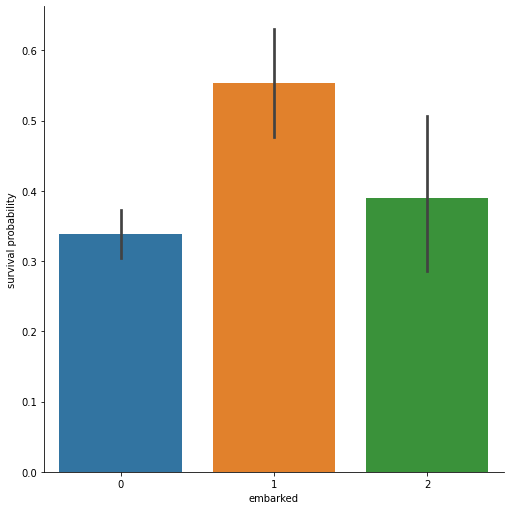

In [71]:
g = sns.factorplot(x="embarked", y="survived", data=tit, size=7, kind="bar")
g = g.set_ylabels("survival probability")

sibsp

In [72]:
tit['sibsp'].nunique()

7

In [73]:
tit['sibsp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


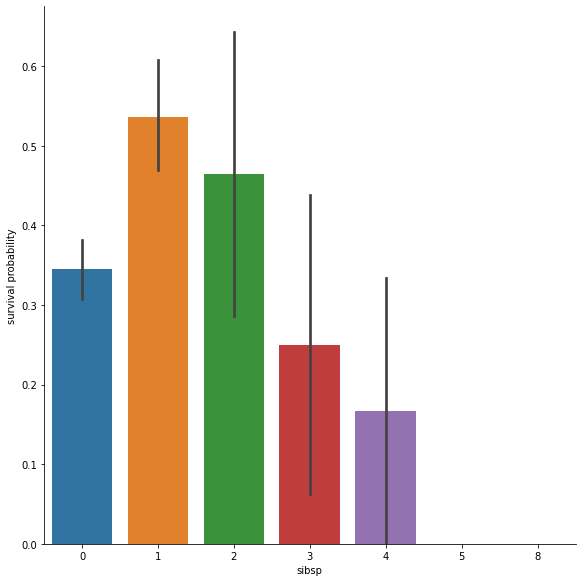

In [74]:
bargraph_sibsp = sns.factorplot(x = "sibsp", y = "survived", data = tit, kind = "bar", size = 8)
bargraph_sibsp = bargraph_sibsp.set_ylabels("survival probability")

Pclass

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


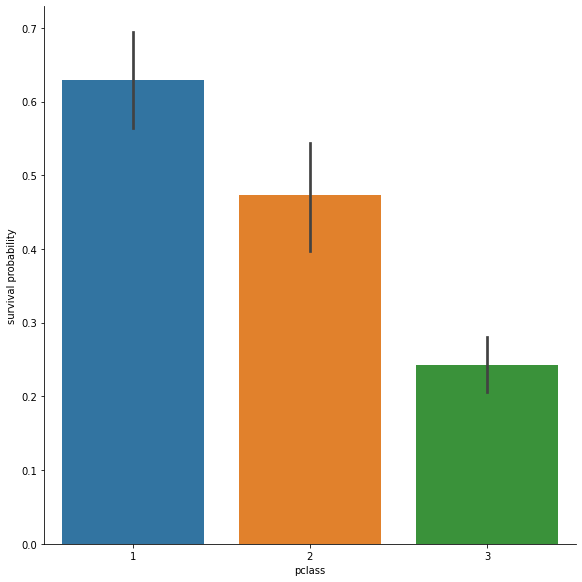

In [75]:
pclass = sns.factorplot(x = "pclass", y = "survived", data = tit, kind = "bar", size = 8)
pclass = pclass.set_ylabels("survival probability")

In [76]:
tit.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'alive', 'alone'],
      dtype='object')

class , alive , alone

In [77]:
list1 = ['class', 'alive', 'alone']
tit.drop(list1, axis=1, inplace=True)

In [78]:
tit.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [79]:
print(pd.isnull(tit).sum())

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64


splitting data

In [80]:
# input and output data

x = tit.drop(tit.columns[[0]], axis = 1)
y = tit['survived']

In [81]:
x.head()

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


In [82]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [83]:
# splitting into training and testing data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.30, random_state =0)

FEATURING SCALING

In [84]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain) 
xtest = sc_x.transform(xtest)

CLASSIFICATION

In [97]:
logreg = LogisticRegression()
svc_classifier = SVC()

In [96]:
logreg.fit(xtrain, ytrain)
svc_classifier.fit(xtrain, ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

predicting data

In [94]:
logreg_ypred = logreg.predict(xtest)
svc_classifier_ypred = svc_classifier.predict(xtest)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


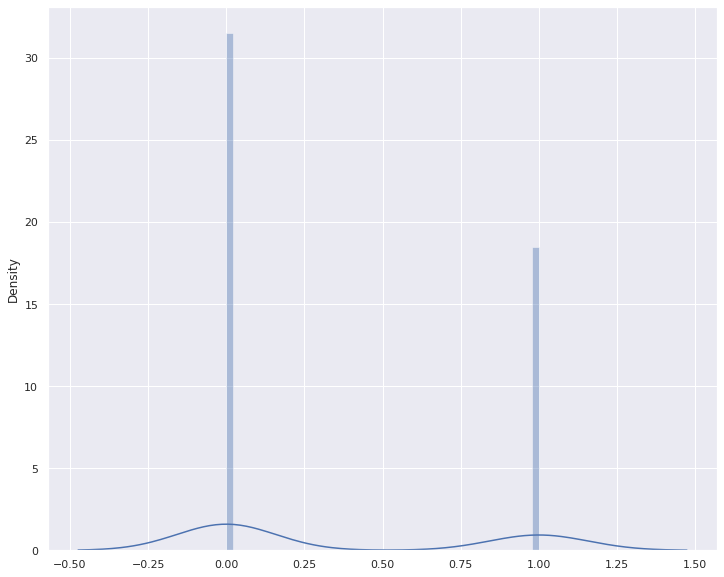

In [98]:
sns.distplot((logreg_ypred),bins=50)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


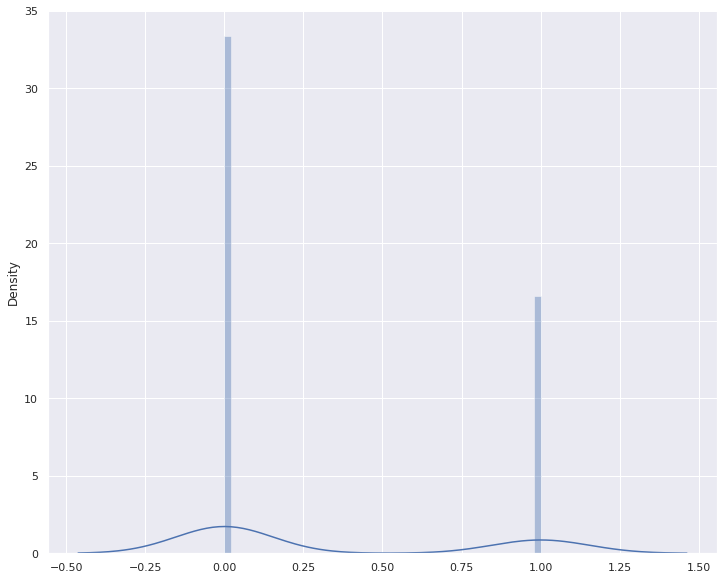

In [99]:
sns.distplot((svc_classifier_ypred),bins=50)

finding accuracy

In [92]:
# finding accuracy
from sklearn.metrics import accuracy_score

logreg_acc = accuracy_score(ytest, logreg_ypred)
svc_classifier_acc = accuracy_score(ytest, svc_classifier_ypred)


In [93]:
print ("Logistic Regression : ", round(logreg_acc*100, 2))
print ("Support Vector      : ", round(svc_classifier_acc*100, 2))


Logistic Regression :  79.48
Support Vector      :  81.72


done